In [1]:
%pip install windrose

In [2]:
import pandas as pd
from windrose import WindroseAxes
from matplotlib import cm
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from datetime import datetime
import math

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('WxStation Data.csv')
df.rename(columns={'Wind Speed (mph)': 'speed', 'Wind Gust (mph)':'gust','Max Daily Gust (mph)': 'gust max','Wind Direction (°)':'dir'}, inplace=True)
today = datetime.now()
year = str(today.year)

wnd = pd.DataFrame()

a = df['Simple Date']
b=[]
for i in a:
    b.append(datetime.strptime(i, "%Y-%m-%d %H:%M:%S"))

wnd['date']=b
wnd['speed'] = df['speed']
wnd['gust'] = df['gust']
wnd['maxgust'] = df['gust max']
wnd['dir'] = df['dir']

feb = pd.DataFrame()
mar = pd.DataFrame()
apr = pd.DataFrame()
may = pd.DataFrame()
jun = pd.DataFrame()
jul = pd.DataFrame()


feb = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-02-01',year+'-02-31')]
mar = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-03-01',year+'-03-31')]
apr = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-04-01',year+'-04-31')]
may = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-05-01',year+'-05-31')]
jun = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-06-01',year+'-06-31')]
jul = wnd[wnd['date'].dt.strftime('%Y-%m-%d').between(year+'-07-01',year+'-07-31')]

Feb = feb[feb['speed'] != 0.0]
Mar = mar[mar['speed'] != 0.0]
Apr = apr[apr['speed'] != 0.0]
May = may[may['speed'] != 0.0]
Jun = jun[jun['speed'] != 0.0]
Jul = jul[jul['speed'] != 0.0]
Wnd = wnd[wnd['speed'] != 0.0]
Wnd = Wnd[Wnd['gust'] != 0.0]

In [4]:
febmg = feb.groupby(feb['date'].dt.date).first()
febmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

marmg = mar.groupby(mar['date'].dt.date).first()
marmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

aprmg = apr.groupby(apr['date'].dt.date).first()
aprmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

maymg = may.groupby(may['date'].dt.date).first()
maymg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

junmg = jun.groupby(jun['date'].dt.date).first()
junmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

julmg = jul.groupby(jul['date'].dt.date).first()
julmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

wndmg = wnd.groupby(wnd['date'].dt.date).first()
wndmg.drop(['date', 'speed', 'gust'], axis=1, inplace=True)

# Define custom colormap
colors = ["#000080", "#012cff", "#00d5f7", "#7cfd7f", "#fde801", "#ff4503", "#7e0100"]
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors)

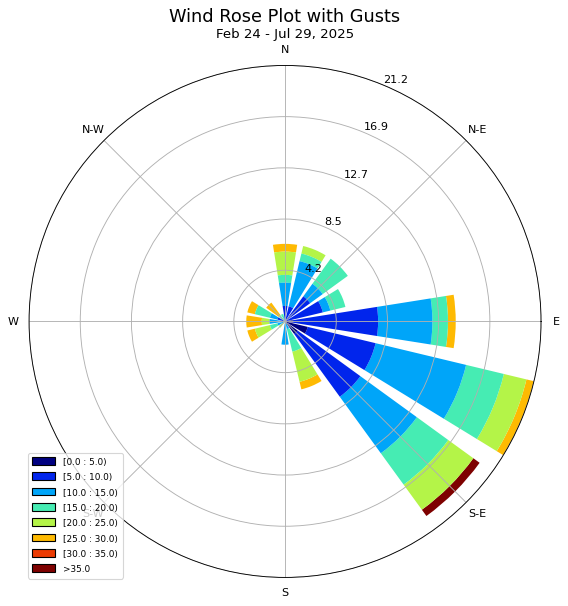

In [6]:


bins = [0, 5, 10, 15, 20, 25, 30, 35]

ax = WindroseAxes.from_ax()
ax.bar(wndmg['dir'].values, wndmg['maxgust'].values, normed=True, cmap=cmap, label='Gust Speed', bins=bins)#np.arange(0, 15, 3))
ax.set_legend()
plt.suptitle('Wind Rose Plot with Gusts', fontsize = 16,y=0.99)
plt.title('Feb 24 - Jul 29, 2025', fontsize = 12)
plt.savefig("YTDGusts.png")
plt.show()

In [226]:
moinpt = (input("Input a value range (All=Wnd, Month = Mmm)")).capitalize()
print("\n\n")
val = (input("What wind data type do you want? <Sustained winds = speed, Gusts = gust>")).lower()

Input a value range (All=Wnd, Month = Mmm) Feb


What wind data type do you want? <Sustained winds = speed, Gusts = gust> speed


11 1


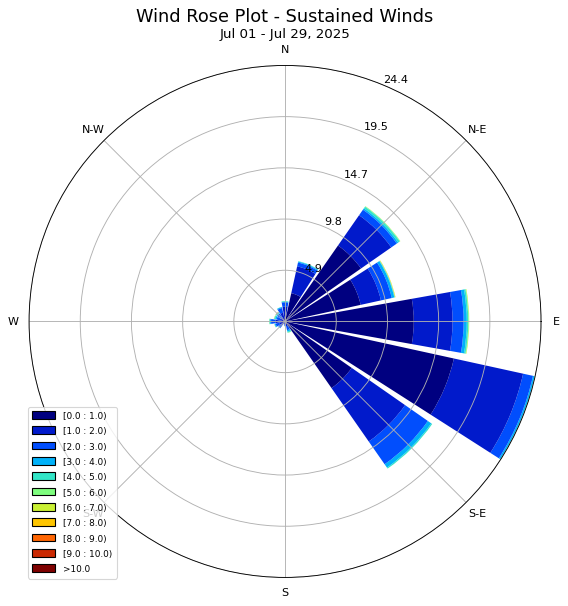

In [249]:
mo = Jul
val = 'speed'
#val = 'gust'
#bins = [0, 0.1, 1, 2, 5, 7, 10, 15, 20]
bins = [0, 0.9, 2, 5, 7, 10, 15, 20]
maxval = int(max(mo[val]))+(max(mo[val])%1>0)
stpval = (int(max(mo[val])/8)+(max(mo[val]) % 8>0))-1
binsm = [0, 0.9, 2, 5, 7, 10, 15, 20, maxval]
print(maxval, stpval)
rngs = mo.iloc[-1]['date'].strftime('%b %d')
rnge = mo.iloc[0]['date'].strftime('%b %d')
rngy = mo.iloc[0]['date'].strftime('%Y')
flerngs = mo.iloc[-1]['date'].strftime('%b')
flernge = mo.iloc[0]['date'].strftime('%b')
if flerngs == flernge:
    filedate = flerngs
else:
    filedate = flerngs+'-'+flernge
if val == 'speed':
    dattype = 'Winds'
    title = 'Wind Rose Plot - Sustained Winds'
else:
    dattype = 'Gusts'
    title = 'Wind Rose Plot - Gusts'
filename = filedate+dattype

ax = WindroseAxes.from_ax()
#ax.bar(Wnd['dir'].values, Wnd['speed'].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, 20, 3))
#ax.bar(Wnd['dir'].values, Wnd['gust'].values, normed=True, cmap=cmap, label='Wind Speed', bins=bins)
#ax.bar(mo['dir'].values, mo[val].values, normed=True, cmap=cmap, label='Wind Speed', bins=binsm)
ax.bar(mo['dir'].values, mo[val].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, maxval, stpval),opening=0.9)

ax.set_legend()
plt.suptitle(title, fontsize = 16,y=0.99)
plt.title(rngs+' - '+rnge+', '+rngy, fontsize = 12)
plt.show()
#plt.savefig(filename)

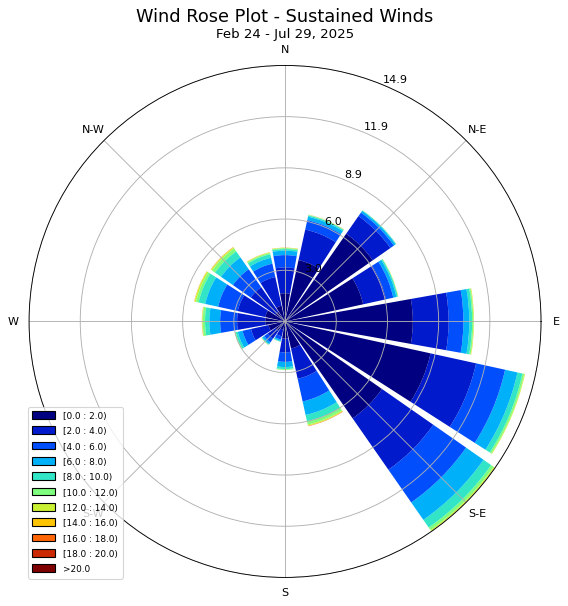

<Figure size 640x480 with 0 Axes>

In [218]:
#title = 'Wind Rose Plot - Sustained Winds'

ax = WindroseAxes.from_ax()
#ax.bar(Wnd['dir'].values, Wnd['speed'].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, 20, 3))
#ax.bar(Wnd['dir'].values, Wnd['gust'].values, normed=True, cmap=cmap, label='Wind Speed', bins=bins)
#ax.bar(mo['dir'].values, mo[val].values, normed=True, cmap=cmap, label='Wind Speed', bins=binsm)
ax.bar(mo['dir'].values, mo[val].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, maxval, stpval),opening=0.9)
ax.set_legend()
plt.suptitle(title, fontsize = 16,y=0.99)
plt.title(rngs+' - '+rnge+', '+rngy, fontsize = 12)
plt.show()
plt.savefig(filename)

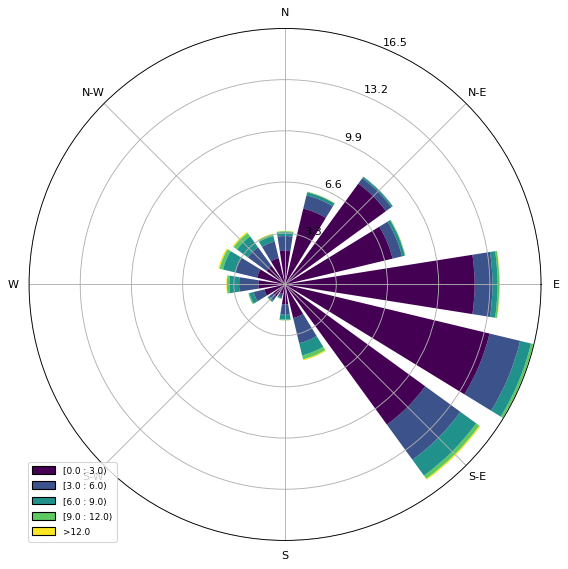

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(df['dir'].values,df['speed'].values, normed=True, cmap=cm.viridis,bins=np.arange(0, 15, 3)) #autumn jet summer OrRd Oranges viridis
#can also include --> bins=np.arange(MIN VALUE,MAX VALUE, STEP SIZE)

#ax.bar(df['dir'].values,df['speed'].values,opening=0.8, edgecolor="white", normed=True, cmap=cm.viridis) #autumn jet summer OrRd Oranges viridis
ax.set_legend()

Text(0.5, 1.0, 'February Winds (mph)')

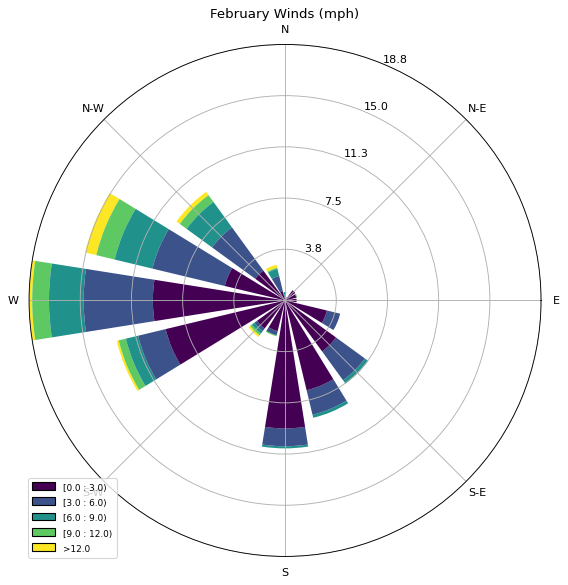

In [63]:
ax = WindroseAxes.from_ax()
ax.bar(feb['dir'].values,feb['speed'].values, normed=True, cmap=cm.viridis,bins=np.arange(0, 15, 3))
ax.set_legend()
plt.title("February Winds (mph)")
#plt.savefig("FebWinds.png")

Input a value range (All=Wnd, Month = #) 3


What wind data type do you want? <Sustained winds = s, Gusts = g> s


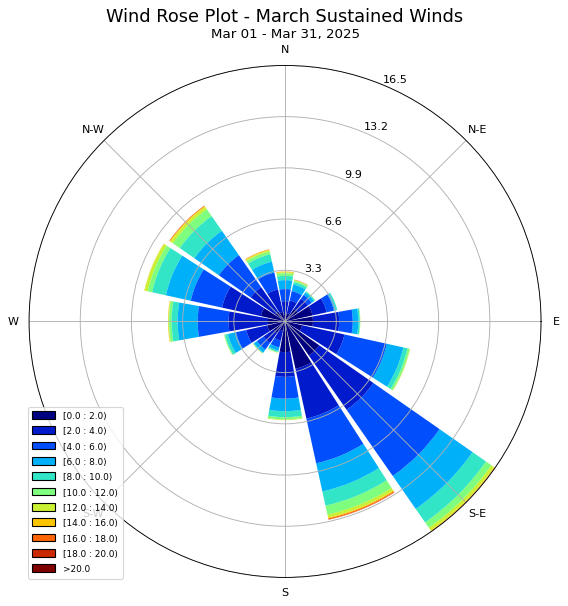

In [14]:
moinpt = (input("Input a value range (All=Wnd, Month = #)")).capitalize()
print("\n")
valinpt = (input("What wind data type do you want? <Sustained winds = s, Gusts = g>")).lower()
print("\n\n\n")
if valinpt == 's':
    val = 'speed'
elif valinpt == 'g':
    val = 'gust'

data = {"All":Wnd,"2":Feb,"3":Mar,"4":Apr,"5":May,"6":Jun,"7":Jul}

mo = data[moinpt]


maxval = int(max(mo[val]))+(max(mo[val])%1>0)
stpval = (int(max(mo[val])/8)+(max(mo[val]) % 8>0))-1
binsm = [0, 0.9, 2, 5, 7, 10, 15, 20, maxval]

rngs = mo.iloc[-1]['date'].strftime('%b %d')
rnge = mo.iloc[0]['date'].strftime('%b %d')
rngy = mo.iloc[0]['date'].strftime('%Y')
flerngs = mo.iloc[-1]['date'].strftime('%b')
flernge = mo.iloc[0]['date'].strftime('%b')
if flerngs == flernge:
    filedate = flerngs
    #filedatefull = mo.iloc[-1]['date'].strftime('%B')
else:
    filedate = flerngs+'-'+flernge
    #filedatefull = ""
if valinpt == 's':
    dattype = 'Winds'
    if flerngs == flernge:
        title = 'Wind Rose Plot - '+(mo.iloc[-1]['date'].strftime('%B'))+' Sustained Winds'
    else:
        title = 'Wind Rose Plot - Sustained Winds'
elif valinpt == 'g':
    dattype = 'Gusts'
    if flerngs == flernge:
        title = 'Wind Rose Plot - '+(mo.iloc[-1]['date'].strftime('%B'))+' Gusts'
    else:
        title = 'Wind Rose Plot - Gusts'
    #title = 'Wind Rose Plot - Gusts'
filename = str(filedate+dattype)+'.png'

ax = WindroseAxes.from_ax()
ax.bar(mo['dir'].values, mo[val].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, maxval, stpval),opening=0.9)
ax.set_legend()
plt.suptitle(title, fontsize = 16,y=0.99)
plt.title(rngs+' - '+rnge+', '+rngy, fontsize = 12)
#plt.savefig(filename)
#plt.show()
#plt.savefig("JulWinds.png")

In [22]:
maxvalspd = int(max(mo['speed']))+(max(mo['speed'])%1>0)
stpvalspd = (int(max(mo['speed'])/8)+(max(mo['speed']) % 8>0))-1
binsmspd = [0, 0.9, 2, 5, 7, 10, 15, 20, maxvalspd]

maxvalgst = int(max(mo['gust']))+(max(mo['gust'])%1>0)
stpvalgst = (int(max(mo['gust'])/8)+(max(mo['gust']) % 8>0))-1
binsmgst = [0, 0.9, 2, 5, 7, 10, 15, 20, maxvalgst]

Input a value range (All=Wnd, Month = #) 7


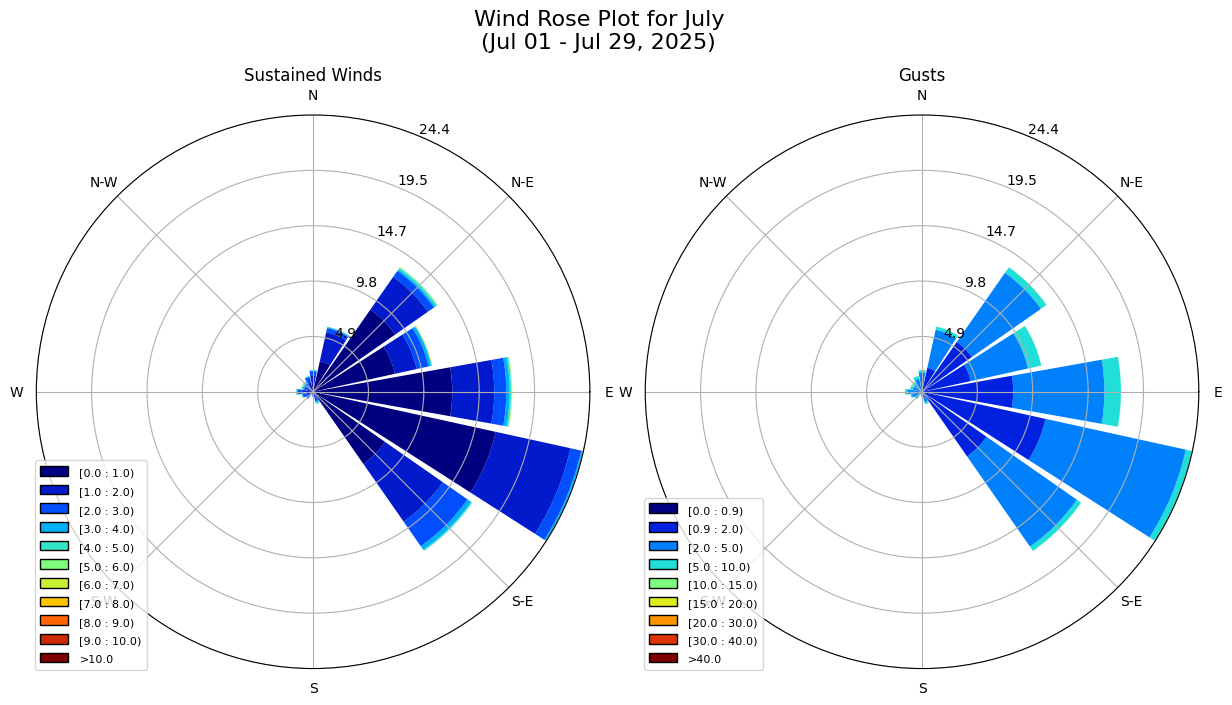

In [11]:
moinpt = (input("Input a value range (All=Wnd, Month = #)")).capitalize()
print("\n")

data = {"All":Wnd,"2":Feb,"3":Mar,"4":Apr,"5":May,"6":Jun,"7":Jul}
mo = data[moinpt]

rngs = mo.iloc[-1]['date'].strftime('%b %d')
rnge = mo.iloc[0]['date'].strftime('%b %d')
rngy = mo.iloc[0]['date'].strftime('%Y')
flerngs = mo.iloc[-1]['date'].strftime('%b')
flernge = mo.iloc[0]['date'].strftime('%b')

maxvalspd = int(max(mo['speed']))+(max(mo['speed'])%1>0)
stpvalspd = (int(max(mo['speed'])/8)+(max(mo['speed']) % 8>0))-1
binsmspd = [0, 0.9, 2, 5, 7, 10, 15, 20, maxvalspd]

maxvalgst = int(max(mo['gust']))+(max(mo['gust'])%1>0)
stpvalgst = (int(max(mo['gust'])/8)+(max(mo['gust']) % 8>0))-1
binsmgst = [0, 0.9, 2, 5, 7, 10, 15, 20, maxvalgst]


fig, axes = plt.subplots(1,2,subplot_kw={'projection':'windrose'}, figsize=(15,9))

if flerngs == flernge:
    filedate = flerngs
    title = 'Wind Rose Plot for '+(mo.iloc[-1]['date'].strftime('%B'))+'\n('+rngs+' - '+rnge+', '+rngy+')'
else:
    filedate = flerngs+'-'+flernge
    title = 'Wind Rose Plot - YTD'

filename = str(filedate+'WindRose')+'.png'

fig.suptitle(title, fontsize = 16)#,y=0.99)


# Plot on the first subplot (left)
ax1 = axes[0]
ax1.bar(mo['dir'].values, mo['speed'].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, maxvalspd, stpvalspd),opening=0.9)
ax1.set_legend()
ax1.set_title('Sustained Winds', fontsize = 12)#,y=0.99)

# Plot on the second subplot (right)
bingst = [0, 0.9, 2, 5, 10, 15, 20, 30, 40]
ax2 = axes[1]
ax2.bar(mo['dir'].values, mo['gust'].values, normed=True, cmap=cmap, label='Wind Speed', bins=bingst,opening=0.9)
#ax2.bar(mo['dir'].values, mo['gust'].values, normed=True, cmap=cmap, label='Wind Speed', bins=np.arange(0, maxvalgst, stpvalgst),opening=0.9)
ax2.set_legend()
ax2.set_title('Gusts', fontsize = 12)#,y=0.99)



plt.subplots_adjust(top=1, wspace=0.1)
plt.savefig(filename)
plt.show()